
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E00_linear_regression.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Linear regression exercises

---
These are introductory exercises in Machine learning with focus in **linear regression** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Simulate phone dataset (*)

We want to simulate data $(x,y)$ to represent cost for phone subscriptions, with: 

- $x$ - called minutes per month
- $y$ - SEK per month 

&nbsp; a) Use ```numpy.random.normal()``` to simulate a dataset with the following requirements:(*)
- set a seed to 42 (for reproducibility and reference)
- simulate 400 x-values from the r.v. $X \sim \mathcal{N}(100, 100)$ 
- take absolute value of these x-values
- simulate noise 400 noise values from r.v. $\epsilon \sim \mathcal{N(0, 50)}$ 
- Let $y = 2x+25+\epsilon$
- plot the data set 

&nbsp; b) Now we want to remove some outliers according to this assumption: (*)
- no one talks more than 300 min using this type of subscription
- no ones costs can be negative
- plot the new dataset
- also plot ground truth using the true parameters $\beta_0 = 25, \beta_1 = 2$

&nbsp; c) Insert the values into a DataFrame (*)

<details>

<summary>Answer</summary>

<img src="../assets/simulated_phone_dataset_0.png" height="200"/>

a) 

Number of points x ≥ 300 min: 8

Number of points y < 0 kr: 6


b)

Length of x, outliers removed 386

Length of y, outliers removed 386

c)

df.head()

|    |   Minutes |     Cost |
|---:|----------:|---------:|
|  0 |   59.4428 | 168.721  |
|  1 |   40.0625 |  98.2118 |
|  2 |  100.524  | 258.433  |
|  3 |  104.698  | 310.548  |
|  4 |   54.9935 | 123.279  |


</details>

---

### 0. a)


In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

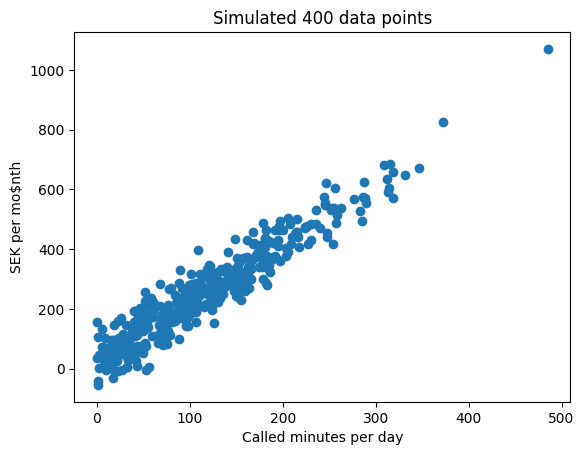

In [174]:
# Simulate some data
np.random.seed(42) # for reproducibility

# X ~ Normal(mean=100, stdev=100)
x = np.random.normal(loc=100, scale=100, size=400)

# Take absolute value
x = np.abs(x)

# epsilon ~ Normal(mean=0, stdev=50)
epsilon = np.random.normal(loc=0, scale=50, size=400)

# y = 2*x + 25 + epsilon
y = 2*x + 25 + epsilon

# Quick scatter plot
plt.scatter(x, y)
plt.xlabel("Called minutes per day")
plt.ylabel("SEK per mo$nth")
plt.title('Simulated 400 data points')
plt.show()


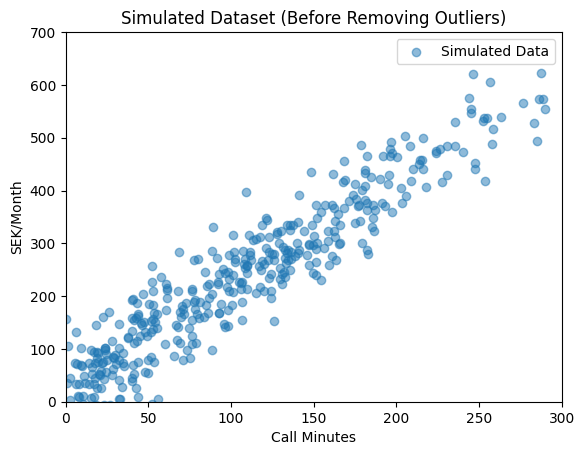

In [175]:
# Set seed for reproducibility
np.random.seed(42)

# Generate 400 x-values from N(100, 100)
x = np.random.normal(100, 100, 400)

# Take absolute values
x = np.abs(x)

# Generate noise from N(0,50)
noise = np.random.normal(0, 50, 400)

# Compute y = 2x + 25 + noise
y = 2 * x + 25 + noise

plt.scatter(x, y, alpha=0.5, label="Simulated Data")
plt.xlabel("Call Minutes")
plt.ylabel("SEK/Month")
plt.title("Simulated Dataset (Before Removing Outliers)")
plt.legend()
plt.xlim(0, 300)  # Set x-axis limits
plt.ylim(0, 700)  # Set y-axis limits
plt.show()



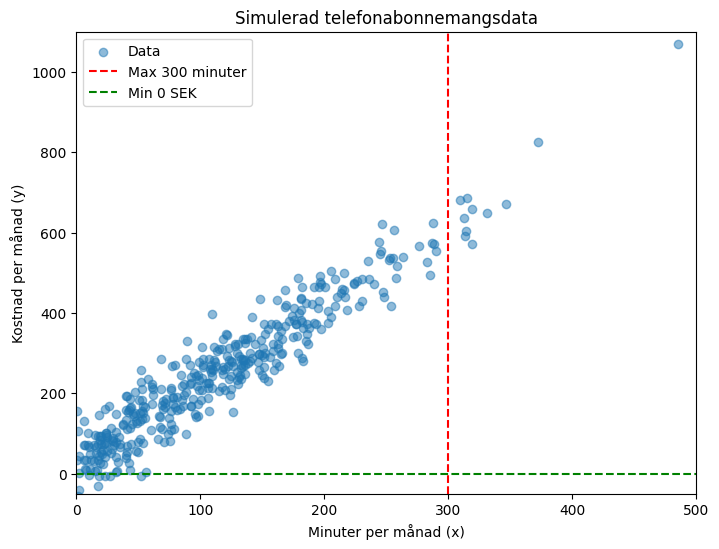

In [176]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate 400 x-values from N(100, 100)
x = np.random.normal(100, 100, 400)

# Take absolute values
x = np.abs(x)

# Generate noise from N(0,50)
noise = np.random.normal(0, 50, 400)

# Compute y = 2x + 25 + epsilon (noise)
y = 2 * x + 25 + noise

# Plot with boundaries
plt.figure(figsize=(8, 6)) # Set figure size 
plt.scatter(x, y, alpha=0.5, label="Data") # Plot data

# Set limits for better visualization
plt.xlim(0, 500) # Set x-axis limits
plt.ylim(-50, 1100) # Set y-axis limits

# Adding boundary lines
plt.axvline(x=300, color='red', linestyle='dashed', label="Max 300 minuter") # Add vertical line
plt.axhline(y=0, color='green', linestyle='dashed', label="Min 0 SEK") # Add horizontal line

# Labels and title in Swedish
plt.xlabel("Minuter per månad (x)") # Set x-axis label
plt.ylabel("Kostnad per månad (y)") # Set y-axis label
plt.title("Simulerad telefonabonnemangsdata") # Set title

# Add legend
plt.legend() # Show legend for labels

# Show plot
plt.show() 

In [177]:
outliers_x = np.sum(x >= 300)
print(f"Number of points where x ≥ 300 min: {outliers_x}") # Extract values ≥ 300 count

outliers_values = x[x >= 300]  # Extracts values ≥ 300 in a list
print("Outlier x values (≥ 300 min):", outliers_values)

outliers_y = np.sum(y <= 0 )  # Extract y values ≤ 0 count
print("Number of points where y ≤ 0 SEK:", outliers_y)

outliers_y_values = y[y <= 0]  # Extracts y values ≤ 0 in a list
print("Outlier y values (≤ 0 SEK):", outliers_y_values)



Number of points where x ≥ 300 min: 11
Outlier x values (≥ 300 min): [346.32421125 319.04556258 372.01691666 485.27314907 331.46585667
 314.39440893 312.2156197  313.30333747 309.23872757 315.31824575
 318.98029332]
Number of points where y ≤ 0 SEK: 8
Outlier y values (≤ 0 SEK): [-54.48438692  -5.69655783  -4.83339438 -41.67731495  -6.05340775
  -3.36951318 -31.48779068  -6.98074857]


### 0. b)

In [178]:
# Identify and count outliers
outliers_x = np.sum(x >= 300)
outliers_y = np.sum(y < 0)

print(f"Number of points x ≥ 300 min: {outliers_x}")
print(f"Number of points y < 0 kr: {outliers_y}")

# Remove outliers
mask = (x < 300) & (y > 0)
x_cleaned = x[mask]
y_cleaned = y[mask]

print(f"Length of x after outlier removal: {len(x_cleaned)}")
print(f"Length of y after outlier removal: {len(y_cleaned)}")

Number of points x ≥ 300 min: 11
Number of points y < 0 kr: 8
Length of x after outlier removal: 381
Length of y after outlier removal: 381


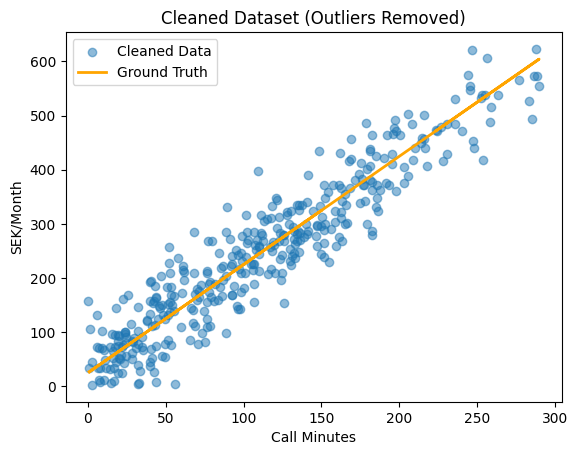

In [179]:
# Plot cleaned dataset
plt.scatter(x_cleaned, y_cleaned, alpha=0.5, label="Cleaned Data") # Plot cleaned data points 
plt.plot(x_cleaned, 2*x_cleaned + 25, color="orange", label="Ground Truth", linewidth=2)
plt.xlabel("Call Minutes")
plt.ylabel("SEK/Month")
plt.title("Cleaned Dataset (Outliers Removed)")
plt.legend()
plt.show()

In [180]:
df = pd.DataFrame({"Minutes": x_cleaned, "Cost": y_cleaned})

# Display first few rows
df.head()



,Minutes,Cost
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


In [181]:
import numpy as np

# Compute predicted values (model output)
y_pred = 2 * x_cleaned + 25  # Using cleaned x values

y_true = y_cleaned  # True values (y)

# Compute RMSE
rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))

print(f"RMSE: {rmse:.2f}")

RMSE: 49.26


## 1. Train|test split (*)

Before moving on with linear regression we shall first perform a train-test-split. 

&nbsp; a) Create a train-test-split function with the following call signature: (*)

```py
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction=.7: float, random_state=42: int, replace=False: bool) -> tuple
```

that returns the tuple:
```
(X_train, X_test, y_train, y_test)
```

&nbsp; b) Now use this to split up your data into a training set and test set. Check manually that the split is performed correctly. (*)


<details>

<summary>Hint</summary>

b) Check the length of each set, and check the indices of the sorted sets that they don't overlap and are not missing. Also check that they sum up to what you expect.

</details>

<br/>

<details>

<summary>Answer</summary>

Using default 0.7: 
- length of X_train: 270
- length of X_test: 116
- length of y_train: 270
- length of X_test: 116

</details>

---

In [182]:
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, 
                     train_fraction: float = 0.7, 
                     random_state: int = 42, 
                     replace: bool = False):
    random_state = np.random.RandomState(random_state) # Create random state
    n = len(X) # Number of samples
    idx = np.arange(n) # Create an array of indices
    random_state.shuffle(idx) # Shuffle indices in-place
    X = X.iloc[idx] # Shuffle X
    y = y.iloc[idx] # Shuffle y
    train_size = int(n * train_fraction) # Compute train size
    X_train = X.iloc[:train_size] # Extract training data
    X_test = X.iloc[train_size:] # Extract test data
    y_train = y.iloc[:train_size] # Extract training labels
    y_test = y.iloc[train_size:] # Extract test labels       
    
    return X_train, X_test, y_train, y_test # Return split data

X_train, X_test, y_train, y_test = train_test_split(df[["Minutes"]], df["Cost"])
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(len(y_train), len(y_test), len(X_train), len(X_test))

X_train shape: (266, 1)
X_test shape: (115, 1)
266 115 266 115


In [183]:
import pandas as pd

# Example data 
df = df 

X = df[["Minutes"]]  # Feature
y = df[["Cost"]]  # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_fraction=0.7, random_state=42)

# Print results
print("X_train:\n", X_train)
print("X_test:\n", X_test)

X_train:
         Minutes
266   39.978312
192   11.614256
46    53.936123
55   193.128012
57    69.078762
..          ...
41   117.136828
294  227.766490
206  213.556564
254   74.743185
332   28.155578

[266 rows x 1 columns]
X_test:
         Minutes
4     76.584663
256  263.241130
340   98.148686
100   41.537074
226   34.839965
..          ...
71   253.803657
106  288.618590
270  166.213067
348  169.014399
102   65.728548

[115 rows x 1 columns]


## 2. Simple linear regression with normal equation (*)

Use the normal equation for simple linear regression to solve for the coefficients $\hat{\beta} = (\beta_0, \beta_1)$. Note that you should only use the training data to fit the regression line, and not data from the test set. Plot the the regression line, together with ground truth and training data. 

<details>

<summary>Hint</summary>

It is important to keep track of the shapes of the vectors, matrices in order for matrix multiplication matmul "@" to work correctly. Also, if you have series object, you need to convert it to numpy. 

</details>

<br/>

<details>

<summary>Answer</summary>


<img src="../assets/Reg_line_normal_eq.png" height="200"/>

</details>

---

In [184]:
# create a linear regression model

X = np.array(X_train).reshape(-1, 1) 
y = np.array(y_train).reshape(-1, 1)   

def gradient_model(X, y, learning_rate=0.00001, n_iters=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(shape=(n_features, 1)) # Initialize weights with zeros 
    bias = 0
    for _ in range(n_iters):
        y_pred = np.dot(X, weights) + bias
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / n_samples) * np.sum(y_pred - y)
        weights -= learning_rate * dw
        bias -= learning_rate * db
    return weights, bias

gradient_model(X, y)

(array([[2.11900737]]), np.float64(0.11400836656802121))

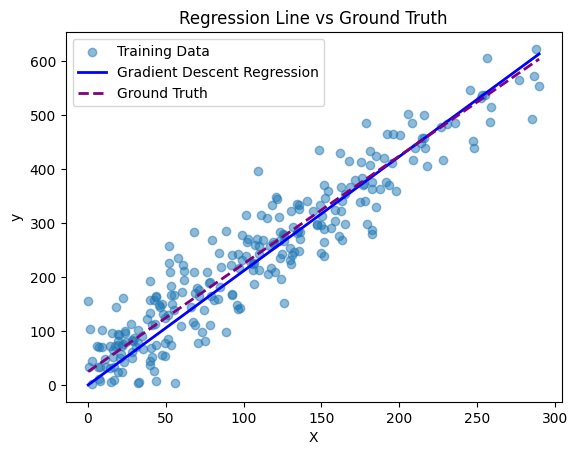

In [193]:
X = np.array(X_train)
y = np.array(y_train)

def gradient_slope(X, y):
    iterations = 1000
    slope = 1
    intercept = 0
    learning_rate = 0.00001
    n = len(X)

    for _ in range(iterations):
        y_pred = slope * X + intercept
        gradient_slope = (-2 / n) * sum(X * (y - y_pred))
        gradient_intercept = (-2 / n) * sum(y - y_pred)

        intercept -= learning_rate * gradient_intercept
        slope -= learning_rate * gradient_slope

    return slope, intercept
       
gradient_slope(X, y)
    
# Get the learned slope and intercept from gradient descent
learned_slope, learned_intercept = gradient_slope(X, y)

# --- Prepare the plot ---

# Create a scatter plot of the training data
plt.scatter(X, y, alpha=0.5, label='Training Data')

# Create x-values for plotting the regression lines
x_line = np.linspace(X.min(), X.max(), 100)

# Calculate y-values for the gradient descent regression line
y_pred_line = learned_slope * x_line + learned_intercept

# Plot the regression line from gradient descent
plt.plot(x_line, y_pred_line, color='blue', linewidth=2, label='Gradient Descent Regression')

# Plot the ground truth line for comparison (if known)
y_ground_truth = 2 * x_line + 25
plt.plot(x_line, y_ground_truth, color='purple', linestyle='--', linewidth=2, label='Ground Truth')

# Label the axes and add a legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Line vs Ground Truth')
plt.legend()
plt.show()
   

    

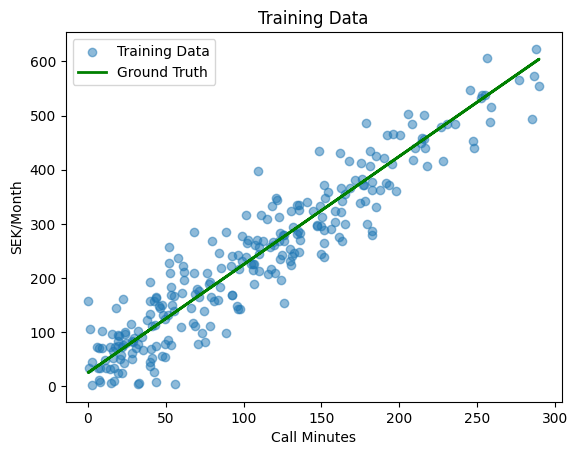

In [186]:
plt.scatter(X_train, y_train, alpha=0.5, label="Training Data")
plt.plot(X_train, 2*X_train + 25, color="green", label="Ground Truth", linewidth=2)
plt.xlabel("Call Minutes")
plt.ylabel("SEK/Month")
plt.title("Training Data")
plt.legend()

In [187]:
import numpy as np
import matplotlib.pyplot as plt

def normal_equation(X_train, y_train):
    """
    Compute linear regression coefficients using the Normal Equation.
    
    Parameters:
        X_train (pd.DataFrame or pd.Series): Feature training data.
        y_train (pd.DataFrame or pd.Series): Target training data.
    
    Returns:
        beta (numpy array): Estimated parameters [β0, β1]
    """
    # Convert to NumPy arrays
    X_train = X_train.to_numpy().reshape(-1, 1)  # Ensure 2D shape
    y_train = y_train.to_numpy().reshape(-1, 1)  # Ensure 2D shape

    # Add bias term (column of ones) to X_train
    X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Shape: (m, 2)

    # Compute the normal equation: β = (X^T X)^(-1) X^T y
    beta_hat = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train
    
    return beta_hat.flatten()  # Convert to 1D array for easier handling

In [188]:
# Compute beta coefficients
beta_hat = normal_equation(X_train, y_train)

# Extract intercept (β0) and slope (β1)
beta_0, beta_1 = beta_hat
print(f"Estimated Coefficients: β0 = {beta_0:.2f}, β1 = {beta_1:.2f}")

Estimated Coefficients: β0 = 32.22, β1 = 1.91


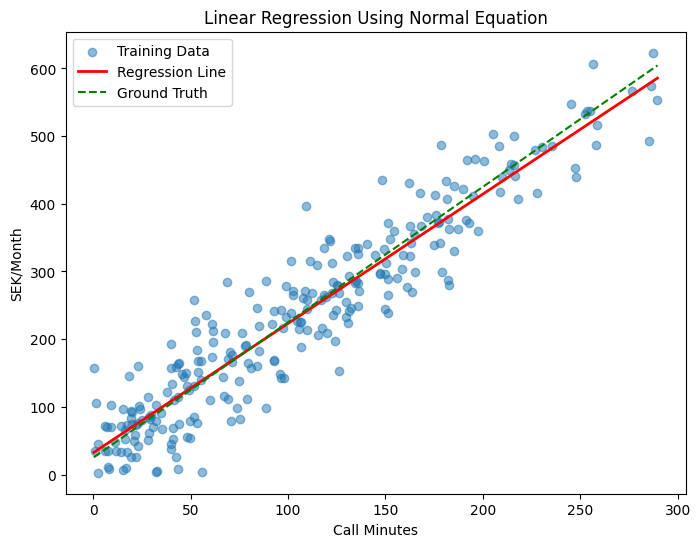

In [189]:
# Generate predictions using trained model
X_train_sorted = np.sort(X_train.to_numpy(), axis=0)  # Sort for plotting
y_pred = beta_0 + beta_1 * X_train_sorted  # Compute predicted y values

# Plot training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label="Training Data", alpha=0.5)

# Plot regression line
plt.plot(X_train_sorted, y_pred, color='red', label="Regression Line", linewidth=2)

# Plot ground truth line (y = 2x + 25)
plt.plot(X_train_sorted, 2 * X_train_sorted + 25, linestyle="dashed", color="green", label="Ground Truth")

# Labels and title
plt.xlabel("Call Minutes")
plt.ylabel("SEK/Month")
plt.title("Linear Regression Using Normal Equation")
plt.legend()
plt.show()

## 3. Prediction and evaluation (*)

&nbsp; a) Use your model to make prediction on testing data. Plot the prediction cost against X_test, and y_test against X_test. (*)

&nbsp; b) Calculate MAE, MSE, RMSE (*)

<details>

<summary>Hint</summary>

Calculate y_pred from X_test and use y_test and y_pred to compute different evaluation metrics.

Careful with dimensions when computing the evaluation metrics, else it can be catastrophical logical errors due to numpy broadcasting feature.

Note that after you have calculate the error metrics on test data you are not allowed to change any parameters to make the line fit better to the testing data.

</details>

<br/>

<details>

<summary>Answer</summary>

a) 

<img src="../assets/eval_simple_lin_reg.png" height="200"/>

b)

Mean absolute error on testing data: 36.97 kr

Mean squared error on testing data: 2374 kr^2

Root mean squared error on testing data: 48.72 kr

</details>

---

## 4. Simulate more explanatory variables (\*)

Now we will simulate the explanatory variables for minutes, text messages and amount of surf. For reference and reproducibility use numpy random seed 42. Assume there is:

- mean start cost: 25kr
- mean cost per minute: 2kr
- mean cost per sms: 50 öre
- mean cost per GB: 50kr

Then the model for the cost will be:
$y = 25 + 2x_1 + 0.5x_2 + 50x_3 + \epsilon$, where

- $x_i$ sampled from r.v. $X_i$ for $i = \{1,2,3\}$
- $X_1 \sim |\mathcal{N}(100,100)|$, (absolute value)
- $X_2 \sim \mathcal{U}(0,50)$, (discrete uniform distribution)
- $X_3 \sim |\mathcal{N}(0,2)|$,
- $\epsilon \sim \mathcal{N}(0,50)$

&nbsp; a) Simulate 10000 samples of each of $x_1, x_2, x_3$ and $y$ and save them in a DataFrame. Also add an intercept column containing ones. (\*)

&nbsp; b) Make histograms for each of the explanatory variables $x_1, x_2, x_3$ and the response variable $y$ (\*)

&nbsp; c) Clean the data using the following constraints (\*)

- surf should be less than 4
- minutes should be less than 300
- cost should be larger than 0

&nbsp; d) Make new histograms for the variables. (\*)

<details>

<summary>Hint</summary>
Your data analysis skill toolbox together with statistics and linear algebra skills are getting quite handy here.

</details>

<br/>

<details>

<summary>Answer</summary>

a)

|      | Intercept | Minutes | SMS | Surf (GB) |    Cost |
| ---: | --------: | ------: | --: | --------: | ------: |
|    0 |         1 | 149.671 |  41 |   2.26301 | 502.396 |
|    1 |         1 | 86.1736 |  16 | 0.0315695 | 179.072 |
|  ... |       ... |     ... | ... |       ... |     ... |
| 9318 |         1 | 149.577 |  31 |   3.43929 | 536.176 |
| 9319 |         1 | 164.439 |  43 |   1.40641 | 406.674 |

b)

<img src="../assets/hist_variables.png" height="200"/>

d)

<img src="../assets/hist_var_cleaned.png" height="200"/>

</details>

---


## 5. Multiple linear regression (*)

&nbsp; a) Perform a train|test split with 0.8 of the data for training. (*)

&nbsp; b) Use the normal equation to compute $\hat{\beta}$ (*)

&nbsp; c) Predict on the test data and compute MAE, MSE and RMSE. (*)

&nbsp; d) Now repeat 4a), 4c), 5a), 5b) using 10, 100, 1000, 10000, 100000, 1000000 samples, and calculate RMSE for each of these simulations. Plot the RMSE against sample size. (**)


<details>

<summary>Hint</summary>

It is important to keep track of the shapes of the vectors, matrices in order for matrix multiplication matmul "@" to work correctly. Also, if you have series object, you need to convert it to numpy. 

</details>

<br/>

<details>
<summary>Answer</summary>


<img src="../assets/RMSE_simulation.png" height="200"/>

</details>

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---